In [59]:
import pandas as pd
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 28.4 MB 26.0 MB/s eta 0:00:01
ERROR: chromosight 1.3.3 requires scikit-learn, which is not installed.
ERROR: mdanalysis 1.1.1 has requirement matplotlib<3.4,>=1.5.1, but you'll have matplotlib 3.4.3 which is incompatible.


In [18]:

file_train_text = "data/training_text/training_text"
file_train_variant = "data/training_variants/training_variants"

In [69]:
train_text = pd.read_csv(file_train_text, sep = '\|\|')
train_text.index.name = "ID"
train_text.columns = ["Text"]

train_variant = pd.read_csv(file_train_variant)
train_variant.set_index("ID",inplace = True)

/home/ragou/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [250]:
train_text.head(1).values

array([["Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocop

In [242]:
train_variant.head(5)

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [ ]:
gene_count = train_variant["Gene"].value_counts().loc[lambda x : x > 100].to_dict()

In [ ]:
gene_class = train_variant[train_variant["Gene"].isin(gene_count.keys())]

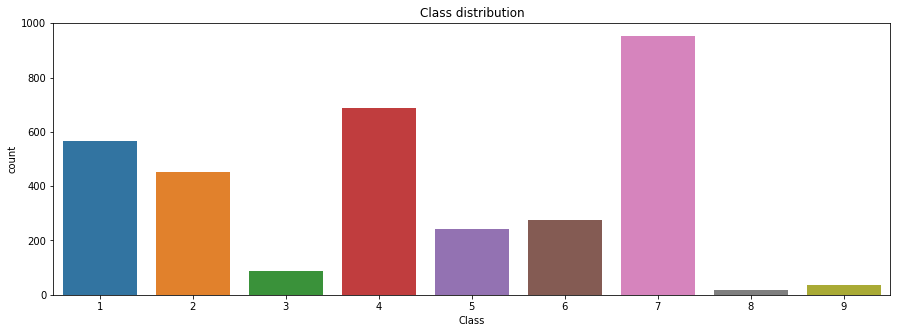

In [229]:
plt.figure(figsize=(15,5))
sns.countplot(x = train_variant["Class"])
plt.title("Class distribution")
plt.show()

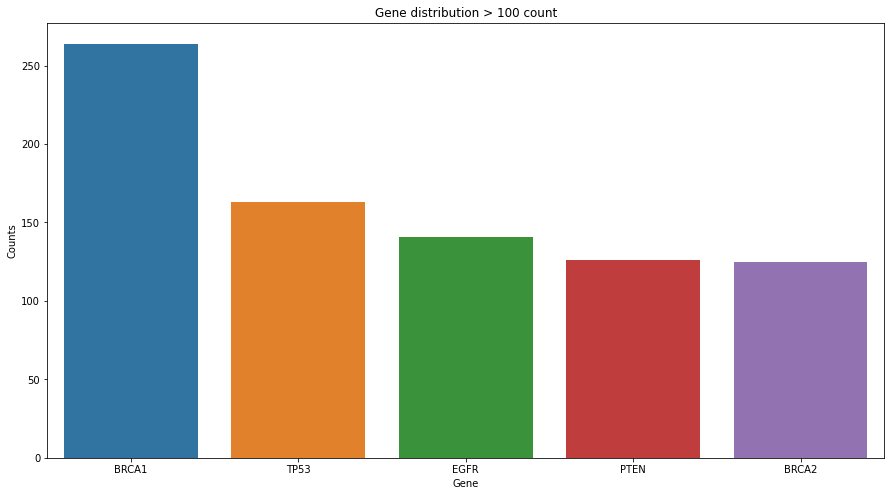

In [240]:
plt.figure(figsize=(15,8))

sns.barplot( x = list(gene_count.keys()), y = list(gene_count.values()))
plt.title("Gene distribution > 100 count")
plt.ylabel("Counts")
plt.xlabel("Gene")

plt.show()

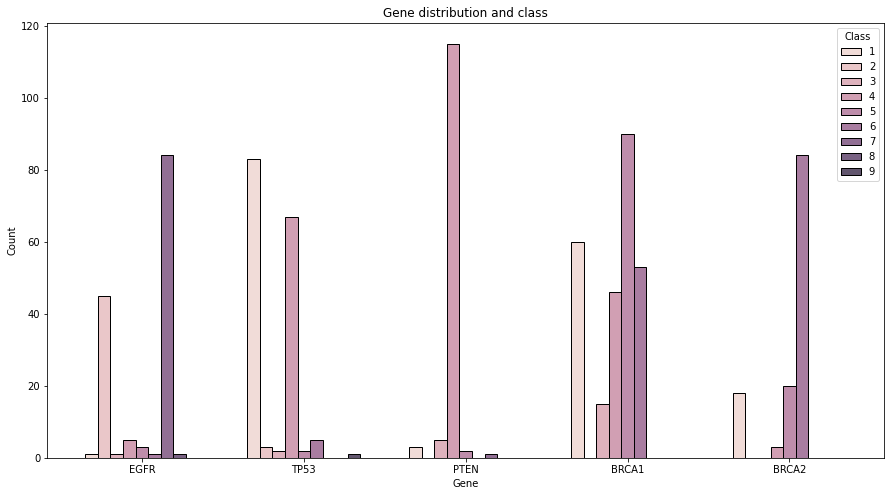

In [244]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_variant[train_variant["Gene"].isin(gene_count.keys())],
             x="Gene", hue="Class", multiple="dodge", shrink=.7)
plt.title("Gene distribution and class")
plt.show()

In [248]:
train_variant[train_variant.Class == 1]

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
7,CBL,Deletion,1
16,CBL,Truncating Mutations,1
37,DICER1,D1709E,1
38,DICER1,D1709A,1
...,...,...,...
3306,RUNX1,W279*,1
3307,RUNX1,Truncating Mutations,1
3309,RUNX1,D171G,1
